In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.makedirs('homeworks/HW02/figures', exist_ok=True)
data = pd.read_csv("sample_data/S02-hw-dataset.csv")
data.head(5) #первые 5 строк


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [11]:
data.info() #инфа о строках и столбцах
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [12]:
print(pd.DataFrame({'доля пропусков': data.isna().mean()})) #доля пропусков
print({'колво дубликатов' : data.duplicated().sum()}) #полностью идентичные строки

           доля пропусков
user_id           0.00000
age               0.04878
country           0.00000
purchases         0.00000
revenue           0.00000
{'колво дубликатов': np.int64(1)}


In [13]:
#поиск отриц чисел
shpion = []
infa = data.select_dtypes(include=[np.number]).columns
for col in infa:
    otric_chisla = data[data[col] < 0]
    if len(otric_chisla) > 0:
        print(f"в столбце {col} обнаружены отрицательные значения {len(otric_chisla)}")
        shpion.append(f"отрицательные значения в {col}")


в столбце purchases обнаружены отрицательные значения 1


In [14]:
#поиск нулей
shpion = []
infa = data.select_dtypes(include=[np.number]).columns
for col in infa:
    null = data[data[col] == 0]
    if len(null) > 0:
        print(f"в столбце {col} обнаружены нули {len(null)}")
        shpion.append(f"нули в {col}")

в столбце purchases обнаружены нули 3
в столбце revenue обнаружены нули 4


развалюхи с которых сыпится песок 1 шт
строка 6 user_id 6, age 120.0, purchases -1, revenue 785


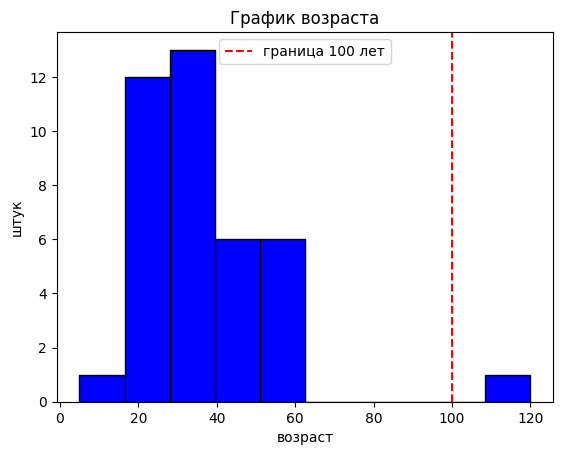

<Figure size 640x480 with 0 Axes>

In [29]:
#поиск развалюх
agebro = 'homeworks/HW02/figures/age.jpg'
age = data[data['age'] > 100]
age = age[~age['age'].isna()]
if len(age) > 0:
  print(f"развалюхи с которых сыпится песок {len(age)} шт")
  for ii, row in age.iterrows():
    print(f"строка {ii+1} user_id {row['user_id']}, age {row['age']}, purchases {row['purchases']}, revenue {row['revenue']}")


age_data = data['age']
plt.hist(age_data, color='blue', edgecolor='black')
plt.xlabel('возраст')
plt.ylabel('штук')
plt.title('График возраста')
plt.axvline(x=100, color='red', linestyle='--', label='граница 100 лет')
plt.legend()
plt.show()
plt.savefig(agebro) #сейффиг че то не захотел сохранять график, там просто белая картинка

         Количество  Доля, %
country                     
RU               13    31.71
FR               12    29.27
US                8    19.51
DE                6    14.63
CN                2     4.88


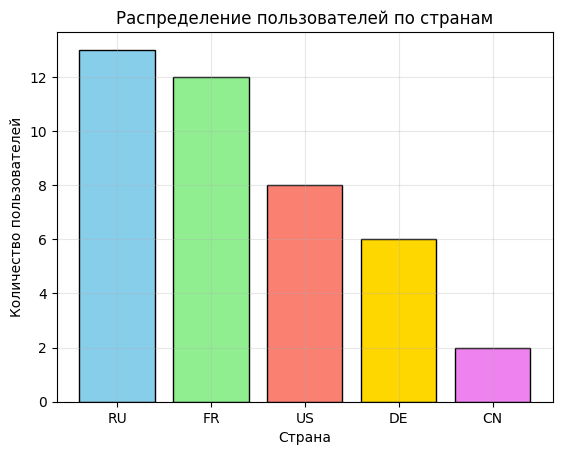

In [33]:
#частоты
country_dist = data['country'].value_counts()
country_percent = data['country'].value_counts(normalize=True) * 100

country_summary = pd.DataFrame({
    'Количество': country_dist,
    'Доля, %': country_percent.round(2)
})
print(country_summary)

plt.bar(country_summary.index, country_summary['Количество'],
            color=['skyblue', 'lightgreen', 'salmon', 'gold', 'violet'],
            edgecolor='black')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по странам')
plt.grid(True, alpha=0.3)

         Возраст_сред  Возраст_медиана  Кол-во_польз  Покупки_сред  \
country                                                              
CN              24.00             24.0             2          4.50   
DE              34.60             35.0             5          6.50   
FR              46.25             42.0            12          4.25   
RU              30.08             26.0            13          4.77   
US              36.71             39.0             7          4.62   

         Покупки_сумма  Выручка_сред  Выручка_сумма  
country                                              
CN                   9       1054.00           2108  
DE                  39       1445.50           8673  
FR                  51        675.92           8111  
RU                  62        790.08          10271  
US                  37        557.38           4459  

2.2 Анализ выручки и покупок по странам:
         Выручка_сумма  Выручка_сред  Выручка_стд  Покупки_сумма  Покупки_сред
country   

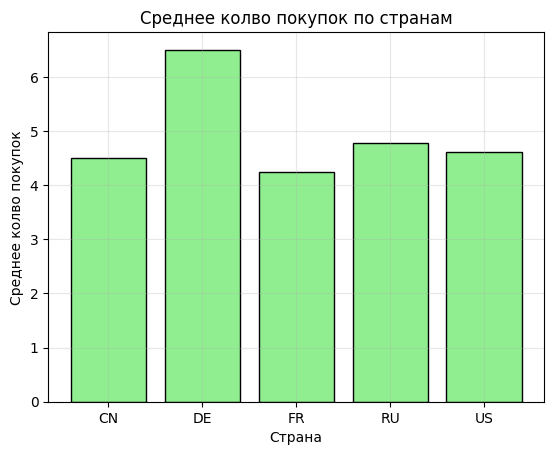

In [39]:
#groupby
grouped = data.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)

# Переименовываем столбцы для лучшей читаемости
grouped.columns = ['Возраст_сред', 'Возраст_медиана', 'Кол-во_польз',
                        'Покупки_сред', 'Покупки_сумма',
                        'Выручка_сред', 'Выручка_сумма']
print(grouped)

#Анализ выручки и покупок по странам
print("\n2.2 Анализ выручки и покупок по странам:")
revenue_country = data.groupby('country').agg({'revenue': ['sum', 'mean', 'std'],'purchases': ['sum', 'mean']}).round(2)
revenue_country.columns = ['Выручка_сумма', 'Выручка_сред', 'Выручка_стд','Покупки_сумма', 'Покупки_сред']
print(revenue_country)


#график ср покупок
plt.bar(grouped_stats.index, grouped_stats['Покупки_сред'],
               color='lightgreen', edgecolor='black')
plt.xlabel('Страна')
plt.ylabel('Среднее колво покупок')
plt.title('Среднее колво покупок по странам')
plt.grid(True, alpha=0.3)

plt.show()